# Le traitement Photo avec python

## Le module `Image`


Le sous-module `Image` du module `PIL` de Python va nous permettre aussi de faire du traitement d'images : passer en noir et blanc, négatif couleurs ....

La première étape est d'importer le module `Image`.

#### Exercice 1
Exécuter la cellule ci-dessous

In [1]:
from PIL import Image

## Nature des images

Lorsqu'on a une image numérique, si on veut pouvoir la modifier ou ce qui est préférable modifier une copie de cette image, il faut connaître le format de l'image (jpeg, jpg, png, gif ...), sa taille et surtout comment sont codés les pixels : c'est ce qu'on appelle le mode. Le mode sera en général RGB pour des images en couleurs et L pour les images en niveaux de gris.  Il existe aussi le mode RGBA où A correspond à un coefficient de transparence.
 
 
 On rappelle qu'une image peut être vue comme un tableau de pixels : la hauteur de l'image  correspond au nombre de lignes et la largeur correspond au nombre de colonnes.
 
Pour une image en couleurs et une image en niveaux de gris (couramment appelé "noir et blanc"), les pixels ne sont pas toujours codés de la même façon. En effet, dans le cas d'une image en niveaux de gris, on sait que les trois composantes R, V et B d'un pixel sont égales ; ainsi si on a par exemple R = V = B = 140, il suffit de stocker l'entier 140 et non le triplet d'entiers (140, 140, 140).


Le module Image permet de déterminer plusieurs caractéristiques d'un fichier image en particulier la taille de l'image et le mode.

 
 #### Exercice 2
 Exécuter la cellule ci-dessous pour pouvoir utiliser la fonction nature. Lire attentivement les commentaires (précédés de # en python)

In [2]:
def nature(fichier_image) :
    """la fonction nature prend en argument le nom complet du fichier (nom et extension) écrit entre guillemets
    cette fonction affiche quelques informations sur l'image"""
    # on "ouvre" l'image pour déterminer ses caractéristiques
    imgsource = Image.open(fichier_image) 
    print("Format de l'image : ", imgsource.format)
    print("Taille de l'image : ", imgsource.size)
    print("Mode de l'image : ", imgsource.mode)
    # on récupère les valeurs du couple imgsource.size donnant la largeur et la hauteur
    L, H = imgsource.size 
    print("En largeur, l'image contient :", L, " pixels")
    print("En hauteur, l'image contient :", H, " pixels")
    # on récupère le codage du pixel de coordonnées (0, 0)
    pixel = imgsource.getpixel((0, 0)) 
    print("le pixel (0, 0) est codé par :", pixel) 
    # instruction pour voir l'image 
    imgsource.show()
    # pour "fermer" l'image
    imgsource.close() 

#### Exercice 3

Les deux fichiers "kingfisher.jpg" et "kingfisherNB.jpg" sont donnés en annexe.    
Exécuter les deux cellules ci-dessous et observez les différences de mode

*Le fichier image kingfisher.jpg est une image de David Mark de Pixabay. Le fichier kingfisherNB.jpg a été obtenu à partir de cette image en utilisant le logiciel libre de traitement d'images GIMP.*

Format de l'image :  JPEG
Taille de l'image :  (640, 426)
Mode de l'image :  RGB
En largeur, l'image contient : 640  pixels
En hauteur, l'image contient : 426  pixels
le pixel (0, 0) est codé par : (249, 190, 130)


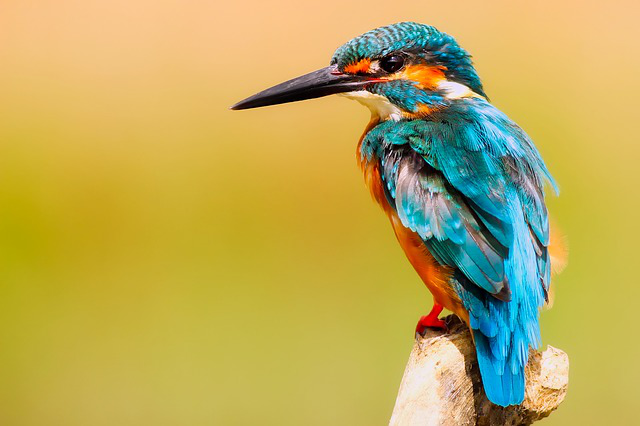

In [3]:
nature("kingfisher.jpg")

On constate qu'un pixel est codé par un triplet RGB : c'est une image en couleurs

Format de l'image :  JPEG
Taille de l'image :  (640, 426)
Mode de l'image :  L
En largeur, l'image contient : 640  pixels
En hauteur, l'image contient : 426  pixels
le pixel (0, 0) est codé par : 203


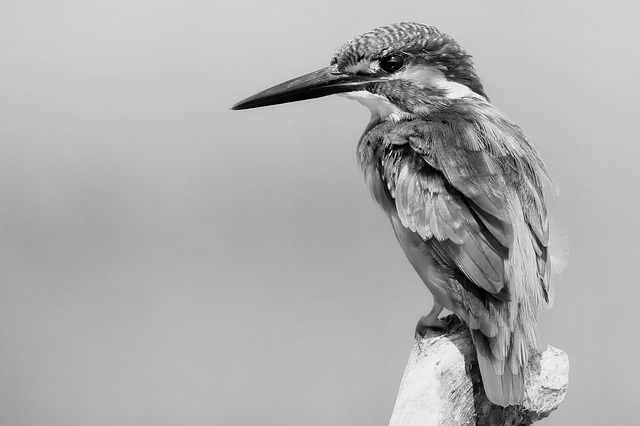

In [4]:
nature("kingfisherNB.jpg")

On constate qu'un pixel est codé par un entier :  c'est une image en niveaux de gris

## Image en nuances de gris

Dans cette partie, on se propose de transformer une image en nuances de gris en appliquant une fonction transformant la valeur de chaque pixel.

Pour cela, on utilise une fonction qui prend en arguments le nom du fichier image et la fonction de transformation.
Il faudra exécuter la cellule pour pouvoir l'utiliser.

In [5]:
# ATTENTION : cette fonction ne pourra être utilisée que pour des images en mode L
 
def transformation(nom_image, f):
    """nom_image est le nom du fichier contenant l'image originale avec son extension et entre guillemets
    f est une fonction qui prend en paramètre un entier compris entre 0 et 255 et renvoie un entier compris entre 0 et 255
    cette fonction affiche une image en nuances de gris"""
    # on ouvre le fichier image à transformer
    img = Image.open(nom_image)
    # on récupère la largeur et la hauteur de l'image
    L, H = img.size 
    # on crée une nouvelle image de même mode (ici 'L') que img et de même taille
    # tous les pixels de cette image sont à 0 autrement dit elle est noire.
    img1 = Image.new(img.mode, img.size) 
    # on parcourt l'image de haut en bas et de droite à gauche pour accéder à chaque pixels de l'image
    for y in range(H):
        for x in range(L):
            # permet de récupérer l'entier compris entre 0 et 255 qui donne l'intensité de lumière
            # correspondant au pixel de coordonnées (x,y)
            valeur_pixel = img.getpixel((x, y)) 
            # on calcule la nouvelle valeur du pixel
            nouvelle_valeur = f(valeur_pixel)  
            # on affecte la valeur que l'on vient de calculer au pixel de coordonnées (x,y) de la nouvelle image
            img1.putpixel((x, y), nouvelle_valeur)
    # on ferme le fichier contenant l'image  originale
    img.close()
    # on affiche la nouvelle image
    img1.show()
    # on ferme le fichier contenant la nouvelle image 
    img1.close()

### Le seuillage

Le seuillage d'une image consiste à transformer une image en niveau de gris en une image dont les valeurs de pixels ne peuvent avoir que la valeur 0 ou 255. On parle alors d'une image binaire ou image en noir et blanc. Cette technique permet d'affecter un niveau uniforme aux pixels pertinents et d'éliminer les autres. Cette technique est parfois utilisée pour faire de la reconnaissance de motif.

Le seuillage consiste à affecter le niveau 255 aux pixels dont la valeur est supérieure à un seuil S et  le niveau 0 aux autres. 

#### Exercice 4 
1. Compléter la fonction `seuil` qui prend en argument un entier `val` et qui renvoie 0 si `val` est inférieur à `127` et 255 sinon. Exécuter ensuite la cellule pour pouvoir utiliser votre fonction. Faites des tests.

In [10]:
def seuil(val):
    """val est un entier compris entre 0 et 255
    cette fonction renvoie 0 ou 255 selon que val est inférieur ou supérieur à 127"""
    if val < 127:
        n = 0
    else:
        n = 255
    return n

In [7]:
# exemple avec un pixel d'intensité 158
print(seuil(158))

255


In [8]:
# autre exemple de votre choix
print(seuil(50))

0


 2. Ecrire une fonction `seuil2(val)` en utilisant une valeur de seuillage de votre choix et la tester.   

In [11]:
 def seuil2(val):
    """val est un entier compris entre 0 et 255
    cette fonction renvoie 0 ou 255 selon que val est inférieur ou supérieur à 100"""
    if val < 100:
        n = 0
    else:
        n = 255
    return n

In [12]:
print(seuil2(127))

255


In [13]:
print(seuil2(99))

0


3. Exécuter la cellule pour transformer l'image en niveaux de gris du martin-pêcheur à l'aide des fonctions `transformation` et  `seuil` 


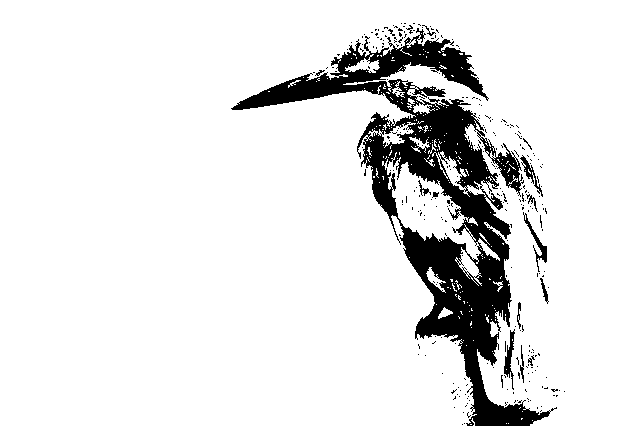

In [14]:
transformation("kingfisherNB.jpg", seuil)

4. Ecrire et exécuter les instructions  pour transformer l'image en niveaux de gris du martin-pêcheur à l'aide des fonctions `transformation` et  `seuil2` 

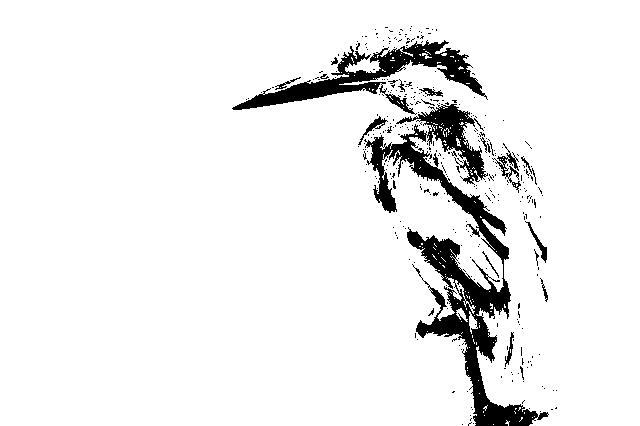

In [15]:
transformation("kingfisherNB.jpg", seuil2)

**Remarque :** Pour pouvoir enregistrer l'image obtenue, il suffit de faire un clic droit sur l'image.

### Le négatif
 #### Exercice 5

Le négatif d'une image en niveau de gris, sera une image en niveau de gris. Si un pixel de l'image originale vaut `val` alors l'intensité du pixel correspondant dans le négatif sera `255 - val`. 

1. Compléter le code de la fonction `negatif_gris`.

In [16]:
def negatif_gris(val):
    """val est un entier compris entre 0 et 255
    cette fonction renvoie 255-val (le complément à 255)"""
    return 255 - val

In [17]:
# exemple avec un pixel d'intensité 158
print(negatif_gris(158))

97


2. Ecrire et exécuter les instructions  pour transformer l'image en niveaux de gris du martin-pêcheur à l'aide des fonctions `transformation` et  `negatif_gris`

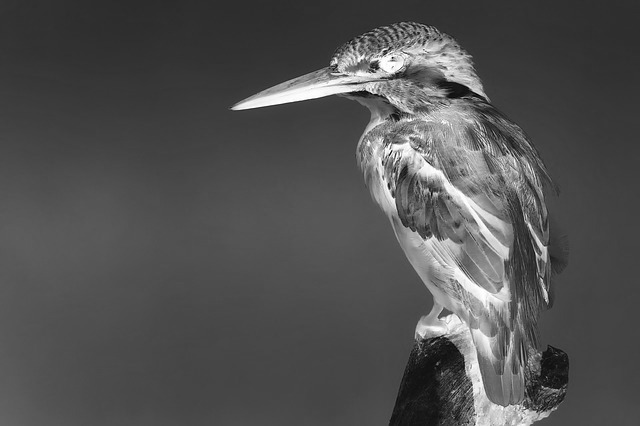

In [18]:
transformation("kingfisherNB.jpg", negatif_gris)

## Image en couleurs

Dans cette partie, on se propose de transformer une image en mode RGB en appliquant une fonction transformant la valeur de chaque pixel. On rappelle que dans ce cas, un pixel est donné par un triplet (r, g, b).

Dans un premier temps, on utilisera une fonction ` transformation_gris` qui prend en arguments le nom du fichier image et la fonction de transformation et qui affichera une image en niveaux de gris (L).

Il faudra exécuter la cellule ci-dessous pour pouvoir l'utiliser.

In [19]:
def transformation_gris(nom_image, f):
    """nom_image est le nom du fichier contenant l'image originale avec son extension et entre guillemets
    f est une fonction qui prend en paramètre un triplet d'entiers compris entre 0 et 255 et qui renvoie un entier compris entre 0 et 255
    la fonction affiche une image en mode L"""
    img = Image.open(nom_image) 
    L, H = img.size 
    # on crée une nouvelle image de mode 'L' et de même taille que l'image originale
    # tous les pixels de cette image sont à 0 autrement dit elle est noire.
    img1 = Image.new("L", img.size) 
    for y in range(H):
        for x in range(L): 
            valeur_pixel = img.getpixel((x, y)) 
            # on calcule le gris correspondant
            nouvelle_valeur = f(valeur_pixel)  
            # on affecte la valeur que l'on vient de calculer au pixel de coordonnées (x,y) de la nouvelle image
            img1.putpixel((x, y), nouvelle_valeur)             
    img.close()
    img1.show()
    img1.close() 
    

### Mettre en niveaux de gris

Chaque pixel d'une image en couleurs est représenté par un triplet de nombres compris entre 0 et 255 pour les canaux respectifs de Rouge, de Vert et de Bleu (RVB ou RGB en anglais). Pour la transformer en une image en niveaux de gris, il suffit de remplacer le triplet (r, g, b) par un entier compris entre 0 et 255 correspondant à une nuance de gris.

Il existe plusieurs façons de définir cet entier en fonction du triplet (r, g, b) ; nous allons en voir deux.

#### Exercice 6 : La recommandation 709 (le beau gris)
La <a href ="https://fr.wikipedia.org/wiki/Rec._709">"recommandation 709"</a> propose une moyenne pondérée à partir de (r, g, b) en prenant pour valeur commune `gris = 0.2126r+0.7152g+0.0722b`  

1. Compléter la fonction `en_gris` qui prend en paramètre un triplet `t` et qui renvoie la valeur du gris selon la recommandation 709.  
Le calcul à faire ne donne pas, en génaral, un résultat entier : il faut donc le convertir en entier avec la fonction `int` de python. 
 

In [20]:
def en_gris(t):
    """t est un triplet d'entiers compris entre 0 et 255
    cette fonction renvoie la valeur du gris de la recommandation 709"""
    # l'instruction ci-dessous permet de stocker le premier élément du triplet dans la variable r,
    # le deuxième dans g et le dernier dans b.  
    R, G, B = t
    # on applique la formule et comme on veut un résultat entier on utilsie la fonction int qui convertit le résulat en entier (arrondi)
    gris = int(0.2126*R + 0.7152*G + 0.0722*B) 
    return gris

In [21]:
# pour tester
print(en_gris((255, 64, 128)))

109


2. Ecrire et exécuter les instructions  pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_gris` et  `en_gris`

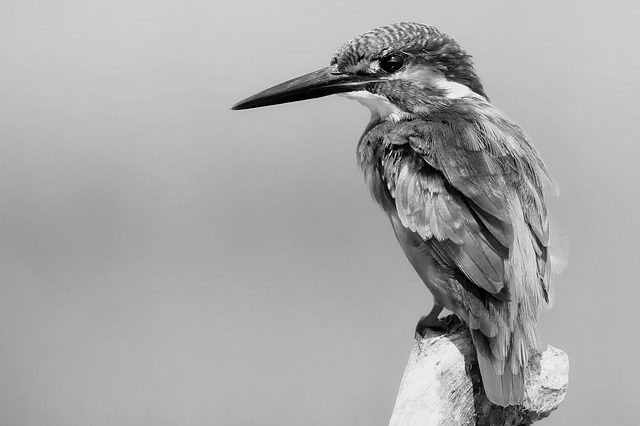

In [22]:
transformation_gris("kingfisher.jpg", en_gris)

#### Exercice 7 :  avec la saturation 

 Chaque pixel d'une image en couleurs est représenté par un triplet RGB ou un triplet TSL pour Teinte, Saturation, Luminosité.   
 Le site  http://www.easyrgb.com/en/math.php#text20 fournit les conversions RGB/TSL.   
 On peut obtenir du gris en annulant la saturation autrement dit en mettant la composante S à 0.    

La conversion RVB -> TSL est complexe, mais dans le cas où S = 0, la conversion TSL -> RGB se simplifie en `R = G = B = L * 255`
 
 D'autre part, la composante L d'une couleur RVB est obtenu par la formule :  $L=\dfrac{\min(R,G,B)+\max(R,G,B)}{2\times 255}.$

 **Finalement**, annuler la saturation revient à calculer la valeur du gris correspondant avec la formule suivante :
 
 $gris =\dfrac{\min(R, G, B)+\max(R, G, B)}2$
 
La fonction $\min(R, G, B)$ renvoie la plus petite des trois valeurs et la fonction $\max(R, G, B)$ renvoie la plus grande des trois valeurs.

1. Compléter la fonction `gris_sat` qui prend en paramètre un triplet `t` et qui renvoie la valeur du gris obtenue avec la saturation.    
Le calcul à faire ne donne pas, en général, un résultat entier : il faut donc convertir en entier.

In [23]:
def gris_sat(t):
    """t est un triplet d'entiers compris entre 0 et 255
    cette fonction renvoie la valeur du gris obtenue avec la saturation"""
    R, G, B = t
    gris = int((min(R, G, B) + max(R, G, B))/2)
    return gris

In [24]:
# pour tester
print(gris_sat((255, 64, 128)))

159


2. Ecrire et exécuter les instructions  pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_gris` et  `gris_sat`

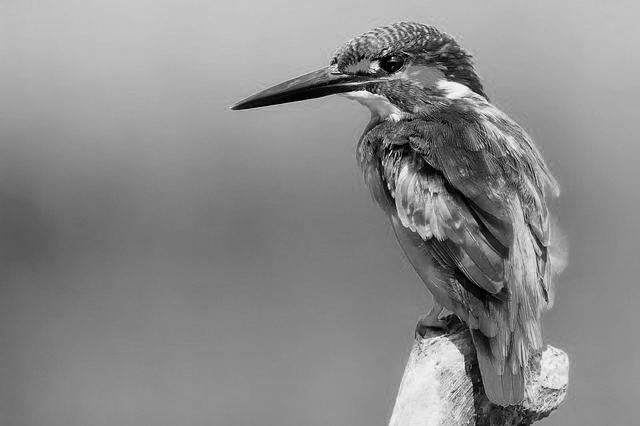

In [25]:
transformation_gris("kingfisher.jpg", gris_sat)

Dans la suite, on utilisera une fonction ` transformation_couleur` qui prend en arguments le nom du fichier image et la fonction de transformation et qui affichera une image en couleur (RGB).

Il faudra exécuter la cellule ci-dessous pour pouvoir l'utiliser.

In [26]:
def transformation_couleur(nom_image, f):
    """nom_image est le nom du fichier contenant l'image originale avec son extension et entre guillemets
    f est une fonction qui prend en paramètre un triplet d'entiers compris entre 0 et 255 et qui renvoie un triplet d'entiers compris entre 0 et 255
    la fonction affiche une image en mode RGB"""
    img = Image.open(nom_image) 
    L, H = img.size 
    # on crée une nouvelle image de mode 'L' et de même taille que l'image originale
    # tous les pixels de cette image sont à 0 autrement dit elle est noire.
    img1 = Image.new("RGB", img.size) 
    for y in range(H):
        for x in range(L): 
            valeur_pixel = img.getpixel((x, y)) 
            # on calcule le gris correspondant
            nouvelle_valeur = f(valeur_pixel)  
            # on affecte la valeur que l'on vient de calculer au pixel de coordonnées (x,y) de la nouvelle image
            img1.putpixel((x, y), nouvelle_valeur)             
    img.close()
    img1.show()
    img1.close() 
    

### Faire un négatif

Le négatif d'une image en couleurs sera une image en couleurs.   
Pour chaque pixel donnée par le triplet (R, G, B), le pixel du négatif sera donné par le triplet (255-R, 255-G, 255-B).

#### Exercice 8
1. Compléter le code de la fonction `negatif_couleur` qui prend en paramètre un triplet `t` et qui renvoie le triplet correspond au négatif.

In [27]:
def negatif_couleur(t) :    
    """t est un triplet d'entiers compris entre 0 et 255
    cette fonction renvoie le triplet du négatif"""
    R, G, B = t
    return (255-R, 255-G, 255-B)
    

In [28]:
# pour tester
negatif_couleur((0, 180, 255))

(255, 75, 0)

2. Ecrire et exécuter les instructions  pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et  `negatif_couleur`

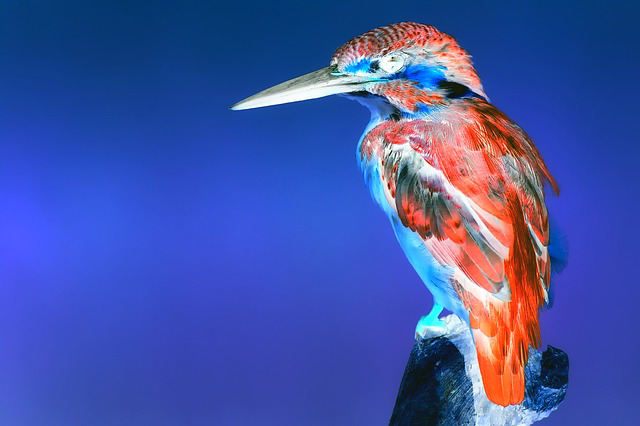

In [29]:
transformation_couleur("kingfisher.jpg", negatif_couleur)

## Obtenir la composante R ou G ou B d'une image couleur

### Composante rouge

Obtenir la composante rouge d'une image couleur consiste à remplacer le triplet (R, G, B) de chaque pixel par le triplet (R, 0, 0) autrement dit on met l'intensité du vert et du bleu à 0.

#### Exercice 9
1. Compléter le code de la fonction `rouge` pour obtenir le triplet `(R, 0, 0)`. 


In [30]:
# Cette fonction ne pourra être utilisée que pour des images en mode RGB et donnera une image en mode RGB 

def rouge(t):       
    """t est un triplet d'entiers compris entre 0 et 255
    cette fonction renvoie le triplet (R, 0, 0)"""
    R, G, B = t
    return (R, 0, 0)
    

In [31]:
# pour tester
rouge((154, 180, 25))

(154, 0, 0)

2. Ecrire et exécuter les instructions pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et `rouge`

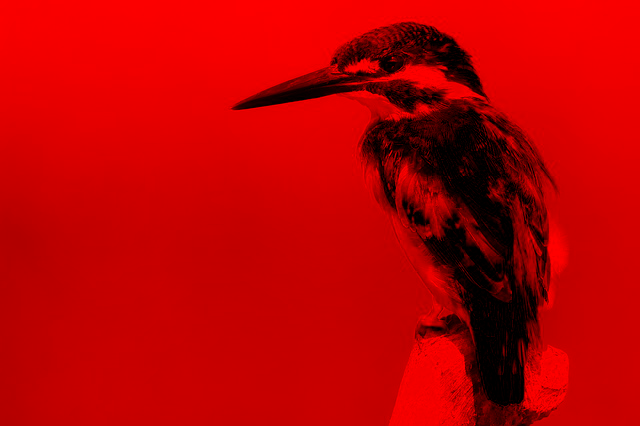

In [32]:
transformation_couleur("kingfisher.jpg", rouge)

3. Ecrire les fonctions `verte` et `bleu` pour obtenir respectivement les composantes verte et bleue.

In [33]:
def verte(t):
    R, G, B = t
    return (0, G, 0)

# pour tester
verte((154, 180, 25))

(0, 180, 0)

In [34]:
def bleue(t):
    R, G, B = t
    return (0, 0, B)


# pour tester
bleue((154, 180, 25))   

(0, 0, 25)

4. Ecrire et exécuter les instructions pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et `verte`

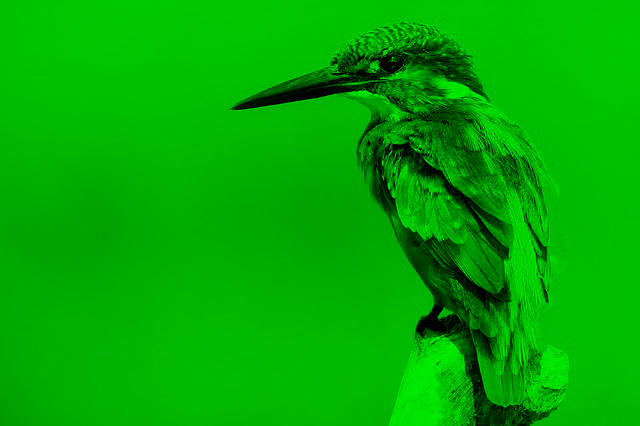

In [35]:
transformation_couleur("kingfisher.jpg", verte)

5. Ecrire et exécuter les instructions pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et `bleue`

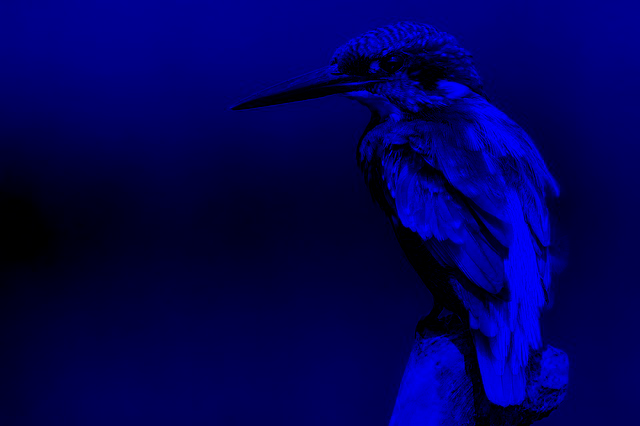

In [36]:
transformation_couleur("kingfisher.jpg", bleue)

### Composante rouge et inverse 
On se propose ici, pour chaque pixel de l'image de garder l'intensité du rouge et d'"inverser" comme pour un négatif l'intensité de vert et de bleu.
 
#### Exercice 10
1.Compléter le code de la fonction `rouge_inverse` pour afficher l'image  permettent de mettre en oeuvre l'opération décrite ci-dessus.   
 


In [37]:
 
def rouge_inverse(t):
    """t est un triplet d'entiers compris entre 0 et 255
    cette fonction renvoie le triplet (R, 0, 0)"""
    R, G, B = t
    return (R, 255-G, 255-B)
    

In [38]:
# pour tester
rouge_inverse((154, 180, 25))

(154, 75, 230)

2. Ecrire et exécuter les instructions pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et `rouge_inverse`

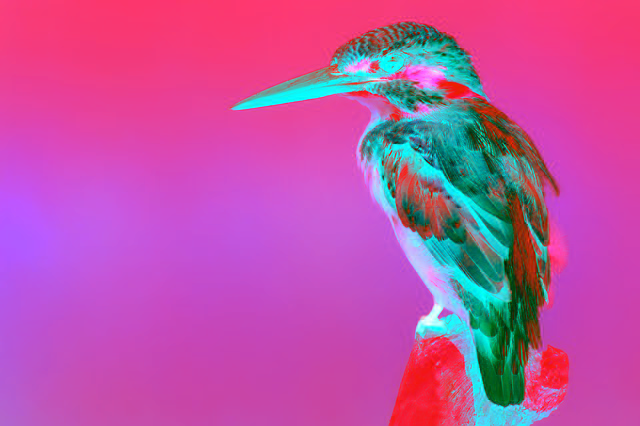

In [39]:
transformation_couleur("kingfisher.jpg", rouge_inverse)

#### Exercice 11
1. Ecrire les fonctions `verte_inverse` et `bleu_inverse` pour obtenir un triplet  de la même façon que pour le rouge.

In [42]:
def verte_inverse(t) :
    R, G, B = t
    return (255-R, G, 255-B)


# On teste 
verte_inverse((154, 180, 25))

(101, 180, 230)

In [44]:
def bleue_inverse(t):
    R, G, B = t
    return (255-R, 255-G, B)


# On teste 
bleue_inverse((154, 180, 25))

(101, 75, 25)

2. Ecrire et exécuter les instructions pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et `verte_inverse`

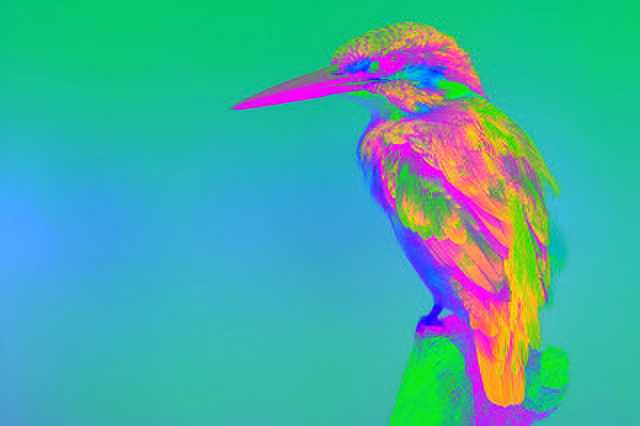

In [45]:
transformation_couleur("kingfisher.jpg", verte_inverse)

3. Ecrire et exécuter les instructions pour transformer l'image en couleurs du martin-pêcheur à l'aide des fonctions `transformation_couleur` et `bleue_inverse`

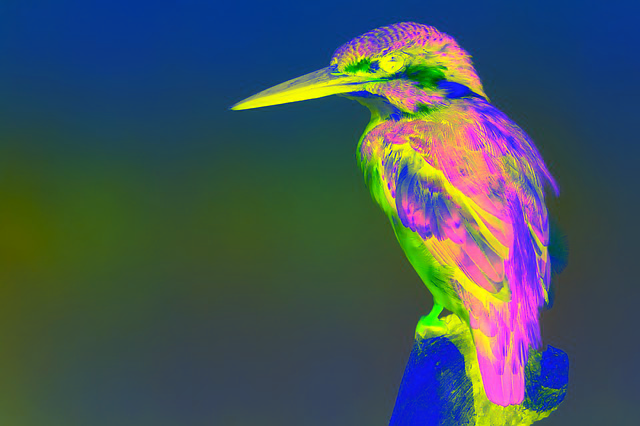

In [46]:
transformation_couleur("kingfisher.jpg", bleue_inverse)

4. Inventer une transformation et écrire la fonction qui va avec.

In [49]:
def g(t) :
    R, G, B = t
    return 255-R, 180-G, B 

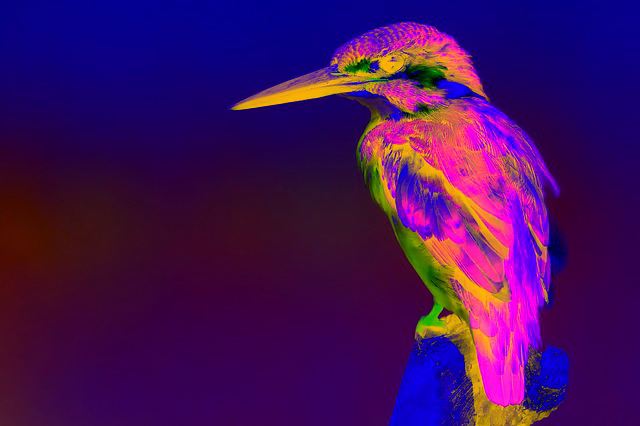

In [50]:
transformation_couleur("kingfisher.jpg", g)

In [47]:
def h(t) :
    R, G, B = t
    return (255-R, (180*2)//2, B) 

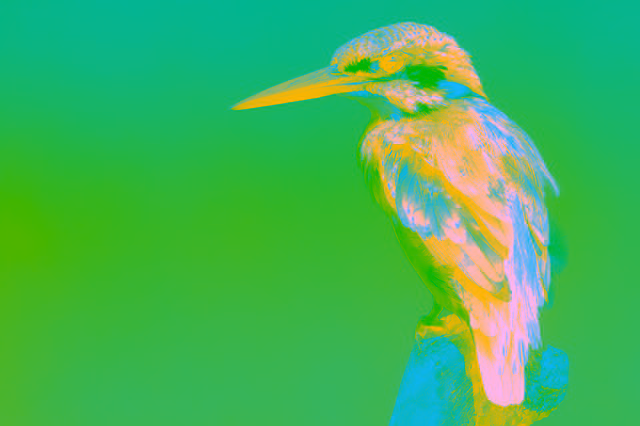

In [48]:
transformation_couleur("kingfisher.jpg", h)